In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
farmlink = pd.read_csv(r"Farmlink_Project_Data.csv")
farmlink.head()

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,c3bbc3140962170f3cbf11f3d4064b5c,unsubscribed,103,19,1,208,0,1,7/17/20,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations
1,4952c138fb131d36003b38f742ac2733,subscribed,103,84,2,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
2,7244ab4036d24fd2560de91a281485ac,subscribed,113,122,0,500,0,500,4/28/20,Donor,Platinum,SingleDonor,Single Donor,Single Donor
3,ca8f96d7edb2ff654be07db2ebbd98c2,subscribed,112,244,4,0,0,517,2/5/21,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
4,e3cd0764e745f7baa17c5b2fb6682fde,subscribed,112,69,0,500,0,500,4/30/20,Donor,Platinum,SingleDonor,Single Donor,Single Donor


### Farmlink EDA by Karen

In [104]:
## data types

farmlink.dtypes

id                     object
status                 object
Sends                   int64
Opens                   int64
Clicks                  int64
lifetodategiving        int64
yeartodategiving        int64
lastgiftamount          int64
lastgiftdate           object
ContactType            object
MonetaryTier           object
DonorStatus            object
IndividualDonorType    object
Tier3Classification    object
dtype: object

In [105]:
## change different column types

farmlink['lastgiftdate'] = pd.to_datetime(farmlink["lastgiftdate"])

type(farmlink['DonorStatus'][0])

str

In [106]:
## is each row unique?

farmlink['id'].shape[0] - farmlink['id'].unique().shape[0]

## not but maybe we can ignore it for now?

1034

In [140]:
by_status_and_donorStatus = farmlink.copy()
by_status_and_donorStatus = (by_status_and_donorStatus[['status', 'MonetaryTier','Sends', 'Opens', 'Clicks','lifetodategiving', 'yeartodategiving', 'lastgiftamount']]
                             .groupby(['status', 'MonetaryTier'])
                             .agg('mean')).loc[['subscribed', 'unsubscribed', 'cleaned', 'transactional']]

by_status_and_donorStatus

Sends      Opens    Clicks  lifetodategiving  \
status        MonetaryTier                                                     
subscribed    Diamond       90.808797  43.065058  2.347282        141.875687   
              Gold          88.131439  41.043517  2.469805         82.976909   
              Other         19.782288  14.948339  2.424354          0.571956   
              Platinum      84.886667  53.314815  4.205926        276.004444   
              Silver        89.321981  39.873065  2.391125         54.863777   
unsubscribed  Diamond       29.053064  17.173721  0.644346        112.792798   
              Gold          28.320652  16.483696  1.293478         54.943841   
              Other          6.365854   6.756098  0.585366          0.000000   
              Platinum      28.986523  23.517520  0.792453        283.687332   
              Silver        29.392079  15.227723  0.534653         31.376238   
cleaned       Diamond       31.428571   7.000000  0.404762        154.690476   
              Gold          47.416667   9.375000  3.250000         77.125000   
              Other          6.750000   2.000000  1.166667          0.000000   
              Platinum      17.184211   5.210526  0.210526        263.657895   
              Silver        47.933333  13.233333  0.466667         42.666667   
transactional Diamond        0.000000   0.000000  0.000000        111.449351   
              Gold           0.000000   0.000000  0.000000         55.330827   
              Platinum       0.000000   0.000000  0.000000        282.765625   
              Silver         0.000000   0.000000  0.000000         29.297170   

                            yeartodategiving  lastgiftamount  
status        MonetaryTier                                    
subscribed    Diamond              11.673794       90.855223  
              Gold                  9.326821       34.494671  
              Other                 0.007380        0.970480  
              Platinum             20.668148      280.707407  
              Silver                6.554180       16.131063  
unsubscribed  Diamond               1.782059       89.938092  
              Gold                  4.293478       35.264493  
              Other                 0.000000        0.000000  
              Platinum             11.113208      306.460916  
              Silver                1.615842       17.362376  
cleaned       Diamond              39.547619       93.773810  
              Gold                  2.166667       35.208333  
              Other                 0.000000        0.000000  
              Platinum              0.000000      311.921053  
              Silver                2.966667       16.066667  
transactional Diamond               7.800000       86.070130  
              Gold                  1.368421       34.105263  
              Platinum              0.000000      268.171875  
              Silver                0.000000       14.023585

In [141]:
## what is cleaned or transactional referring to?

cleaned = farmlink.copy()
cleaned = cleaned[cleaned['status'] == 'cleaned']

cleaned.shape

len(df) - len(cleaned)

17675

In [142]:
transactional = farmlink.copy()
transactional = transactional[transactional['status'] == 'transactional']

transactional.shape

len(df) - len(transactional)

17502

/tmp/ipykernel_30/1394727932.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  NA_lastgiftdate_removed = farmlink.copy().dropna(0, subset=['lastgiftdate'])


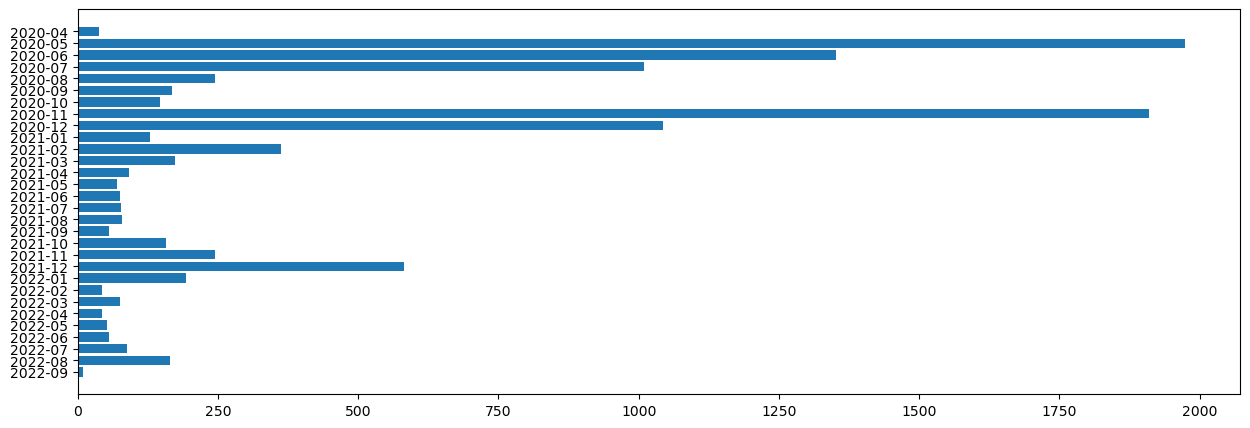

In [143]:
NA_lastgiftdate_removed = farmlink.copy().dropna(0, subset=['lastgiftdate'])

NA_lastgiftdate_removed['lastgiftdate_month_year_form'] = NA_lastgiftdate_removed['lastgiftdate'].apply(lambda x: x.strftime('%Y-%m'))

NA_lastgiftdate_removed = NA_lastgiftdate_removed.sort_values(by='lastgiftdate_month_year_form')
grouped_by_year_month = NA_lastgiftdate_removed.groupby('lastgiftdate_month_year_form').count().sort_index(ascending = False)

plt.figure(figsize=(15,5))

plot = plt.barh(grouped_by_year_month.index, grouped_by_year_month['id'])


##while donations were most popular in 2020, and has decreased since, the holiday season in the fall/winter seem like the 
## most popular time to donate